In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import mode, boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import pickle
import json

import warnings
warnings.filterwarnings("ignore")

## 1. Problem Statement

# 2. Data Gathering

In [177]:
df = pd.read_csv(r"G:\Velocity Aug 22\PROJECTS FOR FRESHER PROFILE\Loan_Dataset\loan_sanction_train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 3.EDA

In [178]:
df.shape

(614, 13)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [180]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [181]:
np.around(df.isna().mean()*100,3)

Loan_ID              0.000
Gender               2.117
Married              0.489
Dependents           2.443
Education            0.000
Self_Employed        5.212
ApplicantIncome      0.000
CoapplicantIncome    0.000
LoanAmount           3.583
Loan_Amount_Term     2.280
Credit_History       8.143
Property_Area        0.000
Loan_Status          0.000
dtype: float64

In [182]:
df = df.drop("Loan_ID", axis = 1)

In [183]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### 1. Gender

In [184]:
df["Gender"].value_counts().to_dict()

{'Male': 489, 'Female': 112}

In [185]:
df["Gender"].replace({'Male': 1, 'Female': 0}, inplace = True)

#### 2. Married

In [186]:
df["Married"].value_counts().to_dict()

{'Yes': 398, 'No': 213}

In [187]:
df["Married"].replace({'Yes': 1, 'No': 0}, inplace = True)

#### 3. Dependents

In [188]:
df["Dependents"].value_counts().to_dict()

{'0': 345, '1': 102, '2': 101, '3+': 51}

In [189]:
df["Dependents"].replace({'0': 0, '1': 1, '2': 2, '3+': 3}, inplace = True)

#### 4. Education

In [190]:
df["Education"].value_counts().to_dict()

{'Graduate': 480, 'Not Graduate': 134}

In [191]:
df["Education"].replace({'Graduate': 1, 'Not Graduate': 0}, inplace = True)

#### 5. Self_Employed       

In [192]:
df["Self_Employed"].value_counts().to_dict()

{'No': 500, 'Yes': 82}

In [193]:
df["Self_Employed"].replace({'No': 1, 'Yes': 0}, inplace = True)

#### 5. ApplicantIncome

In [194]:
df["ApplicantIncome"]

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

#### 6. CoapplicantIncome

In [195]:
df["CoapplicantIncome"]

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64

#### 7. LoanAmount

In [196]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

#### 8. Loan_Amount_Term

In [197]:
df["Loan_Amount_Term"]

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

#### 9. Credit History

In [198]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

#### 10. Property_Area

In [199]:
df["Property_Area"].value_counts().to_dict()

{'Semiurban': 233, 'Urban': 202, 'Rural': 179}

In [200]:
df["Property_Area"].replace({'Semiurban': 1, 'Urban': 0, 'Rural': 2}, inplace = True)

In [201]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,1.0,5849,0.0,NaN,360.0,1.0,0,Y
1,1.0,1.0,1.0,1,1.0,4583,1508.0,128.0,360.0,1.0,2,N
2,1.0,1.0,0.0,1,0.0,3000,0.0,66.0,360.0,1.0,0,Y
3,1.0,1.0,0.0,0,1.0,2583,2358.0,120.0,360.0,1.0,0,Y
4,1.0,0.0,0.0,1,1.0,6000,0.0,141.0,360.0,1.0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,1.0,2900,0.0,71.0,360.0,1.0,2,Y
610,1.0,1.0,3.0,1,1.0,4106,0.0,40.0,180.0,1.0,2,Y
611,1.0,1.0,1.0,1,1.0,8072,240.0,253.0,360.0,1.0,0,Y
612,1.0,1.0,2.0,1,1.0,7583,0.0,187.0,360.0,1.0,0,Y


#### 11. Loan_Status

In [202]:
df["Loan_Status"].value_counts().to_dict()

{'Y': 422, 'N': 192}

In [203]:
df["Loan_Status"].replace({'Y': 1, 'N': 0}, inplace = True)

<AxesSubplot:>

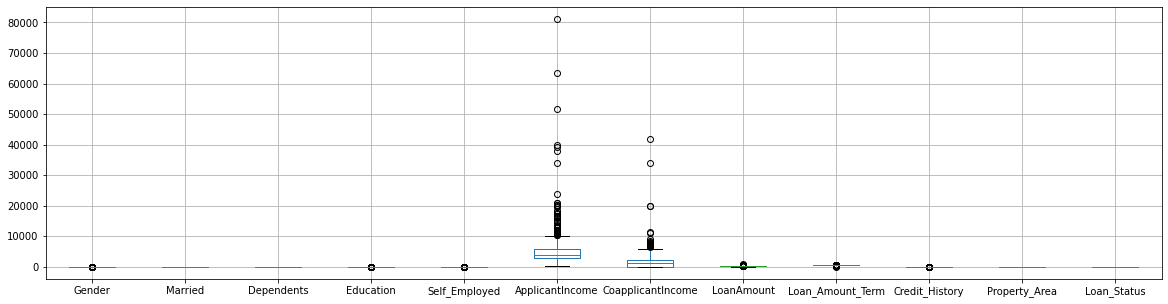

In [204]:
plt.figure(figsize=(20,5))
df.boxplot()

In [205]:
project_data = {"Gender": {'Male': 1, 'Female': 0},
               "Married" : {'Yes': 1, 'No': 0},
               "Dependents":{'0': 0, '1': 1, '2': 2, '3+': 3},
               "Education": {'Graduate': 1, 'Not Graduate': 0},
               "Self_Employed":{'No': 1, 'Yes': 0},
               "Property_Area":{'Semiurban': 1, 'Urban': 0, 'Rural': 2}}

In [206]:
with open ("Project_data.json","w") as f:
    json.dump(project_data, f)

### Handiling Missing Values

In [207]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### 1. Gender

In [208]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

#### 2. Married

In [209]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

#### 3. Dependents

In [210]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

#### 4. Self_Employed

In [211]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [212]:
# df.isna().sum()

#### 5. LoanAmount

<AxesSubplot:xlabel='LoanAmount'>

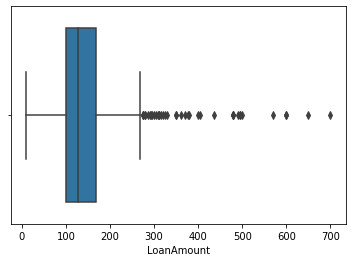

In [213]:
sns.boxplot(x= df["LoanAmount"])

In [214]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

#### 6. Loan_Amount_Term

<AxesSubplot:xlabel='Loan_Amount_Term'>

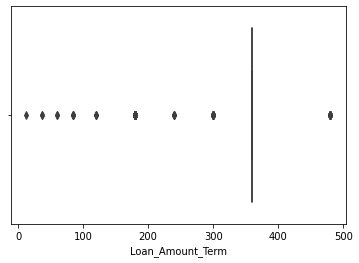

In [215]:
sns.boxplot(x= df["Loan_Amount_Term"])

In [216]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

#### 7. Credit_History

In [217]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [218]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outliers Handling

#### 1. ApplicantIncome

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

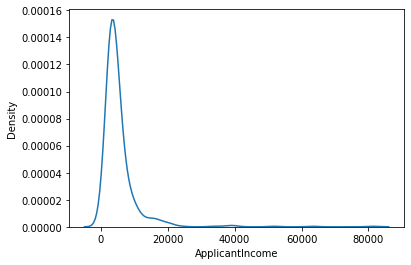

In [219]:
sns.kdeplot(x = df["ApplicantIncome"])

<AxesSubplot:>

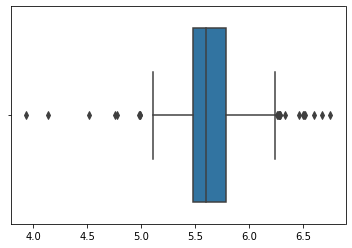

In [220]:
sns.boxplot(x= boxcox(df["ApplicantIncome"])[0])

<AxesSubplot:xlabel='ApplicantIncome'>

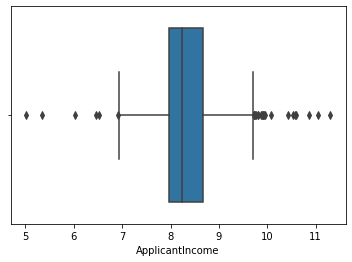

In [221]:
sns.boxplot(x = np.log(df["ApplicantIncome"]))

In [222]:
q1 = df['ApplicantIncome'].quantile(0.25)
q3 = df['ApplicantIncome'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

10171.25

<AxesSubplot:xlabel='ApplicantIncome'>

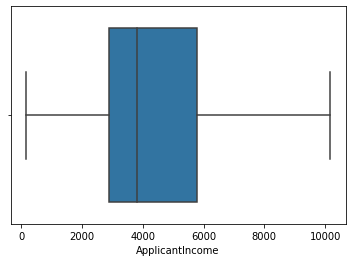

In [223]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] >= upper_tail, upper_tail, df['ApplicantIncome'])
sns.boxplot(x = df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

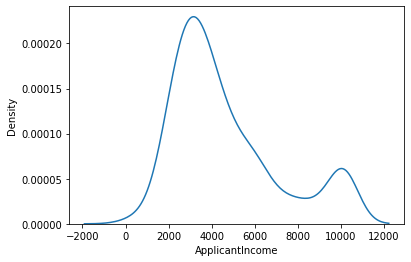

In [224]:
sns.kdeplot(x = df["ApplicantIncome"])

#### 2. CoapplicantIncome

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

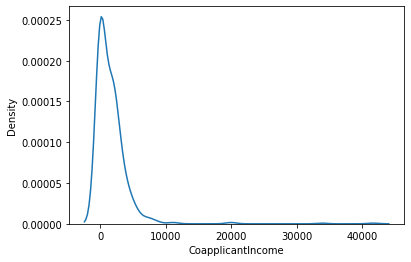

In [225]:
sns.kdeplot(x = df["CoapplicantIncome"])

<AxesSubplot:xlabel='CoapplicantIncome'>

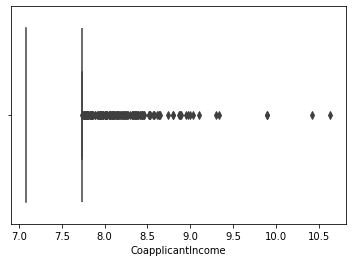

In [226]:
sns.boxplot(x = np.log(df["CoapplicantIncome"]))

In [227]:
q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

5743.125

<AxesSubplot:xlabel='CoapplicantIncome'>

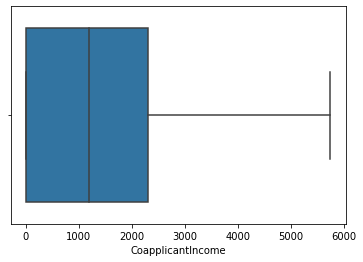

In [228]:
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] >= upper_tail, upper_tail, df['CoapplicantIncome'])
sns.boxplot(x = df['CoapplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

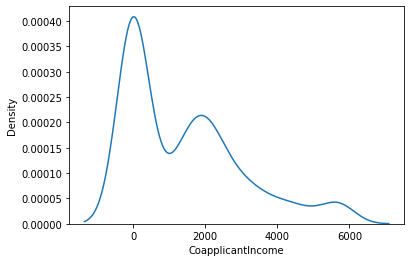

In [229]:
sns.kdeplot(x = df["CoapplicantIncome"])

#### LoanAmount

<AxesSubplot:>

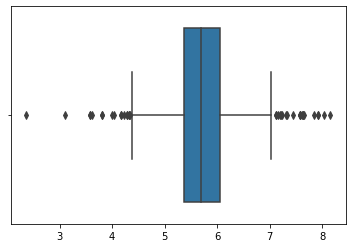

In [230]:
sns.boxplot(x= boxcox(df["LoanAmount"])[0])

<AxesSubplot:xlabel='LoanAmount'>

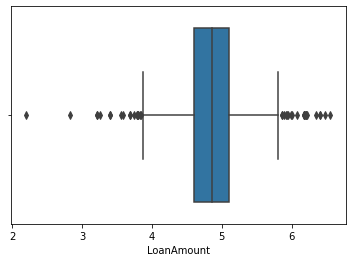

In [231]:
sns.boxplot(x = np.log(df["LoanAmount"]))

In [232]:
q1 = df['LoanAmount'].quantile(0.25)
q3 = df['LoanAmount'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
upper_tail

261.5

<AxesSubplot:xlabel='LoanAmount'>

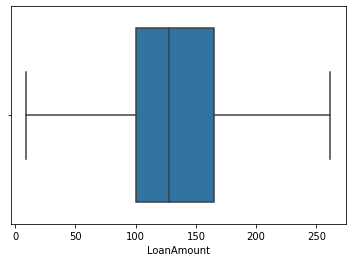

In [233]:
df['LoanAmount'] = np.where(df['LoanAmount'] >= upper_tail, upper_tail, df['LoanAmount'])
sns.boxplot(x = df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

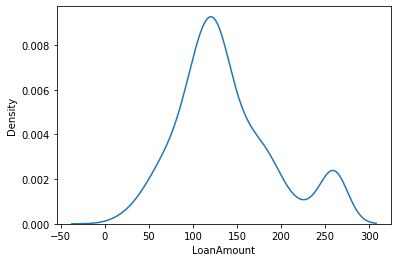

In [234]:
sns.kdeplot(x = df["LoanAmount"])

#### Loan_Amount_Term

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

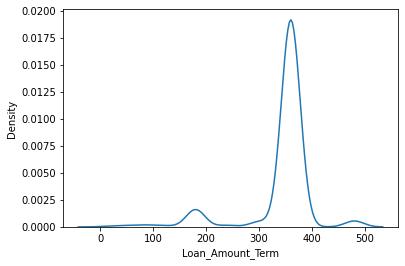

In [235]:
sns.kdeplot(x = df["Loan_Amount_Term"])

<AxesSubplot:>

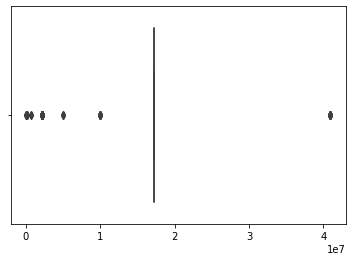

In [236]:
sns.boxplot(x= boxcox(df["Loan_Amount_Term"])[0])

<AxesSubplot:xlabel='Loan_Amount_Term'>

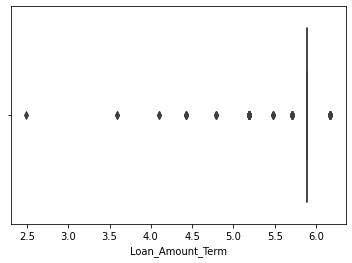

In [237]:
sns.boxplot(x = np.log(df["Loan_Amount_Term"]))

In [238]:
q1 = df['Loan_Amount_Term'].quantile(0.25)
q3 = df['Loan_Amount_Term'].quantile(0.75)
iqr = q3 - q1
lower_tail = q1 - 1.5 * iqr
upper_tail = q3 + 1.5 * iqr
lower_tail

360.0

<AxesSubplot:xlabel='Loan_Amount_Term'>

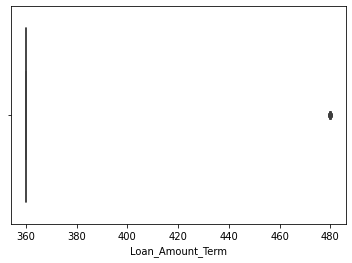

In [239]:
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term'] <= lower_tail, lower_tail, df['Loan_Amount_Term'])
sns.boxplot(x = df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

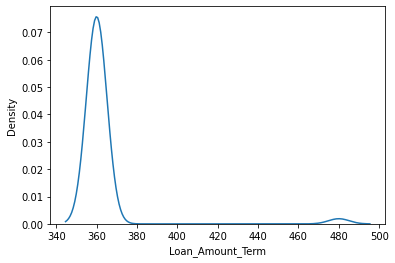

In [240]:
sns.kdeplot(x = df["Loan_Amount_Term"])

In [241]:
upper_tail

360.0

> lower_tail and upper_tail both are same.

In [242]:
# df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term'] >= upper_tail, upper_tail, df['Loan_Amount_Term'])
# sns.boxplot(x = df['Loan_Amount_Term'])

In [243]:
# sns.kdeplot(x = df["Loan_Amount_Term"])

<AxesSubplot:>

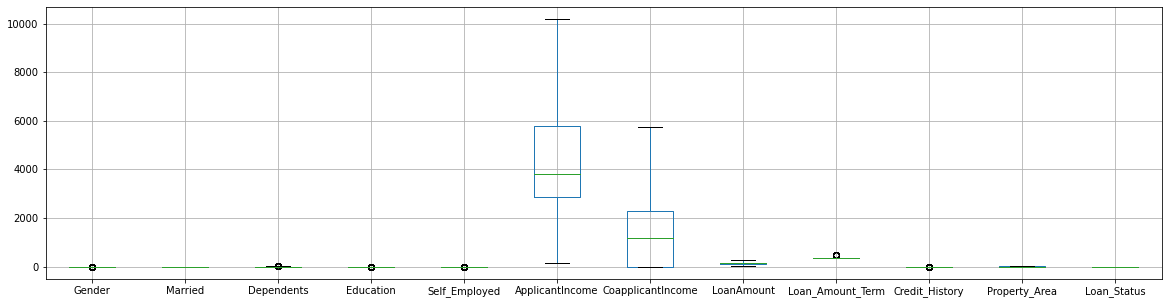

In [244]:
plt.figure(figsize=(20,5))
df.boxplot()

# 4. Feature Selection

In [245]:
x = df.drop(['Loan_Status'], axis = 1)

<AxesSubplot:>

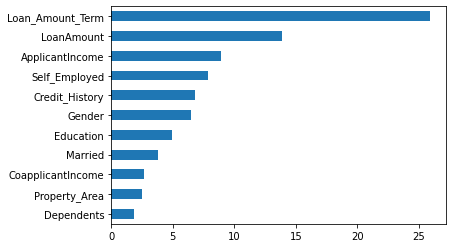

In [246]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.values, i)
    vif_list.append(round(vif,2))

s1 = pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind = 'barh')

In [247]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,1.0,5849.0,0.0,128.0,360.0,1.0,0,1
1,1.0,1.0,1.0,1,1.0,4583.0,1508.0,128.0,360.0,1.0,2,0
2,1.0,1.0,0.0,1,0.0,3000.0,0.0,66.0,360.0,1.0,0,1
3,1.0,1.0,0.0,0,1.0,2583.0,2358.0,120.0,360.0,1.0,0,1
4,1.0,0.0,0.0,1,1.0,6000.0,0.0,141.0,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,1.0,2900.0,0.0,71.0,360.0,1.0,2,1
610,1.0,1.0,3.0,1,1.0,4106.0,0.0,40.0,360.0,1.0,2,1
611,1.0,1.0,1.0,1,1.0,8072.0,240.0,253.0,360.0,1.0,0,1
612,1.0,1.0,2.0,1,1.0,7583.0,0.0,187.0,360.0,1.0,0,1


# 5.Model Training

### Without Handling Outliers

In [248]:
x = df.drop(['Loan_Status'], axis = 1)
y = df["Loan_Status"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=22, stratify=y)


In [249]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)

LogisticRegression()

In [250]:
log_clf.score(x_train, y_train)

0.7983706720977597

In [251]:
log_clf.score(x_test, y_test)

0.8536585365853658

### After Handling Ouliers

In [252]:
x = df.drop(['Loan_Status'], axis = 1)
y = df["Loan_Status"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=22, stratify=y)

In [253]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)

LogisticRegression()

In [254]:
def evaluation_metric(a,b):
    cnf_matrix = confusion_matrix(a,b)
    print("Confusion Matrix: \n",cnf_matrix)
    print("*"*40)
    accuracy = accuracy_score(a,b)
    print("Accuracy is :",accuracy)
    print("*"*40)

    clf_report = classification_report(a,b)
    print("Classification Report :\n",clf_report)


In [255]:
y_pred = log_clf.predict(x_test)
evaluation_metric(y_test, y_pred)

Confusion Matrix: 
 [[20 18]
 [ 0 85]]
****************************************
Accuracy is : 0.8536585365853658
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.53      0.69        38
           1       0.83      1.00      0.90        85

    accuracy                           0.85       123
   macro avg       0.91      0.76      0.80       123
weighted avg       0.88      0.85      0.84       123



In [256]:
y_pred_train = log_clf.predict(x_train)
evaluation_metric(y_train, y_pred_train)

Confusion Matrix: 
 [[ 63  91]
 [  8 329]]
****************************************
Accuracy is : 0.7983706720977597
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.41      0.56       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491



In [257]:
log_test_acc = log_clf.score(x_test, y_test)
log_test_acc

0.8536585365853658

In [258]:
log_train_acc = log_clf.score(x_train, y_train)
log_train_acc

0.7983706720977597

In [259]:
log_clf.score(x_test, y_test)

0.8536585365853658

### 2. Ridge Classifier

In [260]:
ridge_clf = RidgeClassifier()
ridge_clf.fit(x_train, y_train)

RidgeClassifier()

In [261]:
y_pred_test_ridge = ridge_clf.predict(x_test)
evaluation_metric(y_test, y_pred_test_ridge)

Confusion Matrix: 
 [[19 19]
 [ 0 85]]
****************************************
Accuracy is : 0.8455284552845529
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        38
           1       0.82      1.00      0.90        85

    accuracy                           0.85       123
   macro avg       0.91      0.75      0.78       123
weighted avg       0.87      0.85      0.83       123



In [262]:
y_pred_train_ridge = ridge_clf.predict(x_train)
evaluation_metric(y_train, y_pred_train_ridge)

Confusion Matrix: 
 [[ 63  91]
 [  7 330]]
****************************************
Accuracy is : 0.8004073319755601
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.41      0.56       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.69      0.72       491
weighted avg       0.82      0.80      0.77       491



In [263]:
ridge_test_acc = ridge_clf.score(x_test, y_test)
ridge_test_acc

0.8455284552845529

In [264]:
ridge_train_acc = ridge_clf.score(x_train, y_train)
ridge_train_acc

0.8004073319755601

### 3. KNN Algorithm

In [265]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [266]:
y_pred_test_knn = knn_clf.predict(x_test)
evaluation_metric(y_test, y_pred_test_knn)

Confusion Matrix: 
 [[ 7 31]
 [15 70]]
****************************************
Accuracy is : 0.6260162601626016
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.32      0.18      0.23        38
           1       0.69      0.82      0.75        85

    accuracy                           0.63       123
   macro avg       0.51      0.50      0.49       123
weighted avg       0.58      0.63      0.59       123



In [267]:
y_pred_train_knn = knn_clf.predict(x_train)
evaluation_metric(y_train, y_pred_train_knn)

Confusion Matrix: 
 [[ 56  98]
 [ 26 311]]
****************************************
Accuracy is : 0.7474541751527495
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.68      0.36      0.47       154
           1       0.76      0.92      0.83       337

    accuracy                           0.75       491
   macro avg       0.72      0.64      0.65       491
weighted avg       0.74      0.75      0.72       491



In [268]:
knn_test_acc = knn_clf.score(x_test, y_test)
knn_test_acc

0.6260162601626016

In [269]:
knn_train_acc = knn_clf.score(x_train, y_train)
knn_train_acc

0.7474541751527495

#### Hyperparmeter Tuning on KNN Algorithm

In [270]:
knn_model = KNeighborsClassifier()

hyperparameters = {
    'n_neighbors' : np.arange(3,20),
    'p' : [1,2]
        }

gscv_knn_model = GridSearchCV(knn_model, hyperparameters, cv = 3)
gscv_knn_model.fit(x_train, y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=17)

In [271]:
knn_clf1 = gscv_knn_model.best_estimator_
knn_clf1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [272]:
y_pred_test_knn_tune = knn_clf1.predict(x_test)
evaluation_metric(y_test, y_pred_test_knn_tune)

Confusion Matrix: 
 [[ 4 34]
 [ 2 83]]
****************************************
Accuracy is : 0.7073170731707317
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.67      0.11      0.18        38
           1       0.71      0.98      0.82        85

    accuracy                           0.71       123
   macro avg       0.69      0.54      0.50       123
weighted avg       0.70      0.71      0.62       123



In [273]:
y_pred_train_knn_tune = knn_clf1.predict(x_train)
evaluation_metric(y_train, y_pred_train_knn_tune)

Confusion Matrix: 
 [[ 18 136]
 [ 15 322]]
****************************************
Accuracy is : 0.6924643584521385
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.55      0.12      0.19       154
           1       0.70      0.96      0.81       337

    accuracy                           0.69       491
   macro avg       0.62      0.54      0.50       491
weighted avg       0.65      0.69      0.62       491



In [274]:
tune_knn_test_acc = knn_clf1.score(x_test,y_test)
tune_knn_test_acc

0.7073170731707317

In [275]:
tune_knn_train_acc = knn_clf1.score(x_train,y_train)
tune_knn_train_acc

0.6924643584521385

##### After Feature Scaling

##### 1. Normalization

In [276]:
normal_scaler = MinMaxScaler()
array3 = normal_scaler.fit_transform(x)  
normal_xdf = pd.DataFrame(array3, columns= x.columns)
normal_xdf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,1.0,1.0,0.568692,0.000000,0.471287,0.0,1.0,0.0
1,1.0,1.0,0.333333,1.0,1.0,0.442360,0.262575,0.471287,0.0,1.0,1.0
2,1.0,1.0,0.000000,1.0,0.0,0.284396,0.000000,0.225743,0.0,1.0,0.0
3,1.0,1.0,0.000000,0.0,1.0,0.242784,0.410578,0.439604,0.0,1.0,0.0
4,1.0,0.0,0.000000,1.0,1.0,0.583760,0.000000,0.522772,0.0,1.0,0.0


In [277]:
x_train, x_test, y_train, y_test = train_test_split(normal_xdf,y, test_size=0.2, random_state=34, stratify=y)

In [278]:
normal_knn_clf = KNeighborsClassifier()
normal_knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [279]:
y_pred_test = normal_knn_clf.predict(x_test)
evaluation_metric(y_test, y_pred_test)

Confusion Matrix: 
 [[15 23]
 [ 6 79]]
****************************************
Accuracy is : 0.7642276422764228
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.39      0.51        38
           1       0.77      0.93      0.84        85

    accuracy                           0.76       123
   macro avg       0.74      0.66      0.68       123
weighted avg       0.76      0.76      0.74       123



In [280]:
y_pred_train = normal_knn_clf.predict(x_train)
evaluation_metric(y_train, y_pred_train)

Confusion Matrix: 
 [[ 81  73]
 [  9 328]]
****************************************
Accuracy is : 0.8329938900203666
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.53      0.66       154
           1       0.82      0.97      0.89       337

    accuracy                           0.83       491
   macro avg       0.86      0.75      0.78       491
weighted avg       0.84      0.83      0.82       491



In [281]:
normal_knn_test_acc = normal_knn_clf.score(x_test,y_test)
normal_knn_test_acc

0.7642276422764228

In [282]:
normal_knn_train_acc = normal_knn_clf.score(x_train,y_train)
normal_knn_train_acc

0.8329938900203666

##### 2. Standardization

In [283]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,1.0,5849.0,0.0,128.0,360.0,1.0,0,1
1,1.0,1.0,1.0,1,1.0,4583.0,1508.0,128.0,360.0,1.0,2,0
2,1.0,1.0,0.0,1,0.0,3000.0,0.0,66.0,360.0,1.0,0,1
3,1.0,1.0,0.0,0,1.0,2583.0,2358.0,120.0,360.0,1.0,0,1
4,1.0,0.0,0.0,1,1.0,6000.0,0.0,141.0,360.0,1.0,0,1


In [284]:
std_scaler = StandardScaler()
x1 = df[["ApplicantIncome",'CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
y1 = df.drop(["ApplicantIncome",'CoapplicantIncome','LoanAmount','Loan_Amount_Term',"Loan_Status"], axis = 1)
array3 = std_scaler.fit_transform(x1)
scaler_xdf = pd.DataFrame(array3, columns=x1.columns)
scaler_df = pd.concat([y1, scaler_xdf], axis = 1)
scaler_df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1.0,0.0,0.0,1,1.0,1.0,0,0.497164,-0.874587,-0.168041,-0.158246
1,1.0,1.0,1.0,1,1.0,1.0,2,-0.013767,0.054395,-0.168041,-0.158246
2,1.0,1.0,0.0,1,0.0,1.0,0,-0.652632,-0.874587,-1.280462,-0.158246
3,1.0,1.0,0.0,0,1.0,1.0,0,-0.820924,0.578025,-0.311579,-0.158246
4,1.0,0.0,0.0,1,1.0,1.0,0,0.558104,-0.874587,0.065209,-0.158246
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,1.0,1.0,2,-0.692990,-0.874587,-1.190750,-0.158246
610,1.0,1.0,3.0,1,1.0,1.0,2,-0.206274,-0.874587,-1.746961,-0.158246
611,1.0,1.0,1.0,1,1.0,1.0,0,1.394319,-0.726739,2.074743,-0.158246
612,1.0,1.0,2.0,1,1.0,1.0,0,1.196969,-0.874587,0.890553,-0.158246


In [285]:
with open ("std_data.pkl", "wb") as f:
    pickle.dump(std_scaler,f)
    

In [286]:
x_train, x_test, y_train, y_test = train_test_split(scaler_df,y, test_size=0.2, random_state=34, stratify=y)

In [287]:
scaler_knn_clf = KNeighborsClassifier()
scaler_knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [288]:
y_pred_Scaler_test = scaler_knn_clf.predict(x_test)
evaluation_metric(y_test, y_pred_Scaler_test)

Confusion Matrix: 
 [[ 9 29]
 [ 6 79]]
****************************************
Accuracy is : 0.7154471544715447
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.60      0.24      0.34        38
           1       0.73      0.93      0.82        85

    accuracy                           0.72       123
   macro avg       0.67      0.58      0.58       123
weighted avg       0.69      0.72      0.67       123



In [289]:
y_pred_Scaler_train = scaler_knn_clf.predict(x_train)
evaluation_metric(y_train, y_pred_Scaler_train)

Confusion Matrix: 
 [[ 74  80]
 [ 11 326]]
****************************************
Accuracy is : 0.814663951120163
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.48      0.62       154
           1       0.80      0.97      0.88       337

    accuracy                           0.81       491
   macro avg       0.84      0.72      0.75       491
weighted avg       0.82      0.81      0.80       491



In [290]:
scaler_knn_test_acc = scaler_knn_clf.score(x_test,y_test)
scaler_knn_test_acc

0.7154471544715447

In [291]:
scaler_knn_train_acc = scaler_knn_clf.score(x_train,y_train)
scaler_knn_train_acc

0.814663951120163

#### Hyperparameter tuning on scaled Data

In [292]:
knn_model = KNeighborsClassifier()

hyperparameters = {
    'n_neighbors' : np.arange(3,20),
    'p' : [1,2]
        }

gscv_knn_model = GridSearchCV(knn_model, hyperparameters, cv = 3)
gscv_knn_model.fit(x_train, y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=14, p=1)

In [293]:
knn_model_scale_tune = KNeighborsClassifier(n_neighbors=8, p=1)
knn_model_scale_tune.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8, p=1)

In [294]:
knn_model_scale_tune.score(x_train, y_train)

0.7983706720977597

In [295]:
knn_model_scale_tune.score(x_test, y_test)

0.7317073170731707

In [296]:
with open ("knn_model.pkl","wb") as f:
    pickle.dump(knn_model_scale_tune,f)

In [297]:
y_pred_tune_Scaler_test = gscv_knn_model.best_estimator_.predict(x_test)
evaluation_metric(y_test, y_pred_tune_Scaler_test)

Confusion Matrix: 
 [[ 9 29]
 [ 2 83]]
****************************************
Accuracy is : 0.7479674796747967
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.24      0.37        38
           1       0.74      0.98      0.84        85

    accuracy                           0.75       123
   macro avg       0.78      0.61      0.60       123
weighted avg       0.76      0.75      0.70       123



In [298]:
y_pred_tune_Scaler_train = gscv_knn_model.best_estimator_.predict(x_train)
evaluation_metric(y_train, y_pred_tune_Scaler_train)

Confusion Matrix: 
 [[ 51 103]
 [ 11 326]]
****************************************
Accuracy is : 0.7678207739307535
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.33      0.47       154
           1       0.76      0.97      0.85       337

    accuracy                           0.77       491
   macro avg       0.79      0.65      0.66       491
weighted avg       0.78      0.77      0.73       491



In [299]:
tune_scaler_knn_test_acc = gscv_knn_model.best_estimator_.score(x_test,y_test)
tune_scaler_knn_test_acc

0.7479674796747967

In [300]:
tune_scaler_knn_train_acc = gscv_knn_model.best_estimator_.score(x_train,y_train)
tune_scaler_knn_train_acc

0.7678207739307535

In [301]:
with open ("knn_model.pkl", "wb") as f:
    pickle.dump(scaler_knn_clf,f)

# Decision Tree

In [302]:
x = df.drop(['Loan_Status'], axis = 1)
y = df["Loan_Status"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=22, stratify=y)

In [303]:
dt_clf = DecisionTreeClassifier(random_state=22)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=22)

In [304]:
y_pred_dt = dt_clf.predict(x_test)
evaluation_metric(y_test, y_pred_dt)

Confusion Matrix: 
 [[22 16]
 [14 71]]
****************************************
Accuracy is : 0.7560975609756098
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.61      0.58      0.59        38
           1       0.82      0.84      0.83        85

    accuracy                           0.76       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.75      0.76      0.75       123



In [305]:
y_pred_dt_train = dt_clf.predict(x_train)
evaluation_metric(y_train, y_pred_dt_train)

Confusion Matrix: 
 [[154   0]
 [  1 336]]
****************************************
Accuracy is : 0.9979633401221996
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [306]:
dt_test_acc = dt_clf.score(x_test, y_test)
dt_test_acc

0.7560975609756098

In [307]:
dt_train_acc = dt_clf.score(x_train, y_train)
dt_train_acc

0.9979633401221996

#### Hyperparameter Tuning on Decision Tree

In [308]:
dt_model = DecisionTreeClassifier()
Hyperparameters = {"criterion" : ['entropy', 'gini'],
                  "max_depth" : np.arange(4,10),
                  "min_samples_split":np.arange(5,20),
                  "min_samples_leaf":np.arange(3,10)
                  }

gscv_dt_model = GridSearchCV(dt_model, Hyperparameters, cv = 5)
gscv_dt_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [309]:
tune_dt_clf = gscv_dt_model.best_estimator_
tune_dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       min_samples_split=14)

In [310]:
y_pred_dt = tune_dt_clf.predict(x_test)
evaluation_metric(y_test, y_pred_dt)

Confusion Matrix: 
 [[19 19]
 [ 3 82]]
****************************************
Accuracy is : 0.8211382113821138
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.50      0.63        38
           1       0.81      0.96      0.88        85

    accuracy                           0.82       123
   macro avg       0.84      0.73      0.76       123
weighted avg       0.83      0.82      0.80       123



In [311]:
y_pred_dt_train = tune_dt_clf.predict(x_train)
evaluation_metric(y_train, y_pred_dt_train)

Confusion Matrix: 
 [[ 70  84]
 [ 10 327]]
****************************************
Accuracy is : 0.8085539714867617
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.45      0.60       154
           1       0.80      0.97      0.87       337

    accuracy                           0.81       491
   macro avg       0.84      0.71      0.74       491
weighted avg       0.82      0.81      0.79       491



In [312]:
tune_dt_test_acc = tune_dt_clf.score(x_test, y_test)
tune_dt_test_acc

0.8211382113821138

In [313]:
tune_dt_train_acc = tune_dt_clf.score(x_train, y_train)
tune_dt_train_acc

0.8085539714867617

# Random Forest

In [350]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [357]:
with open("rf_model.pkl","wb") as f:
    pickle.dump(rf_clf,f)

In [351]:
y_pred_rf = rf_clf.predict(x_test)
evaluation_metric(y_test, y_pred_rf)

Confusion Matrix: 
 [[21 17]
 [ 6 79]]
****************************************
Accuracy is : 0.8130081300813008
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.55      0.65        38
           1       0.82      0.93      0.87        85

    accuracy                           0.81       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.81      0.81      0.80       123



In [352]:
y_pred_rf_train = rf_clf.predict(x_train)
evaluation_metric(y_train, y_pred_rf_train)

Confusion Matrix: 
 [[153   1]
 [  0 337]]
****************************************
Accuracy is : 0.9979633401221996
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [317]:
rf_test_acc = rf_clf.score(x_test, y_test)
rf_test_acc

0.8455284552845529

In [318]:
rf_train_acc = rf_clf.score(x_train, y_train)
rf_train_acc

0.9979633401221996

#### Hyperparameter Tuning on Random Forest

In [319]:
rf_clf = RandomForestClassifier(max_features='auto',
                                bootstrap=True,
                                oob_score=True,
                                n_jobs=-1,
                                random_state=22)

hyperparameters = {
    'n_estimators' : np.arange(10,150),
    'criterion' : ['entropy','gini'],
    'max_depth' : np.arange(2,8),
    'min_samples_split' : np.arange(3,15),
    'min_samples_leaf' : np.arange(2,10)
    }

# gscv_rf_clf = GridSearchCV(rf_clf, hyperparameters, cv = 5)
rscv_rf_clf = RandomizedSearchCV(rf_clf, hyperparameters, cv = 5)

rscv_rf_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_features='auto',
                                                    n_jobs=-1, oob_score=True,
                                                    random_state=22),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  1...
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149])})

In [320]:
tune_rf_clf = rscv_rf_clf.best_estimator_
tune_rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features='auto', min_samples_leaf=9,
                       min_samples_split=3, n_estimators=103, n_jobs=-1,
                       oob_score=True, random_state=22)

In [321]:
y_pred_rf = tune_rf_clf.predict(x_test)
evaluation_metric(y_test, y_pred_rf)

Confusion Matrix: 
 [[19 19]
 [ 0 85]]
****************************************
Accuracy is : 0.8455284552845529
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        38
           1       0.82      1.00      0.90        85

    accuracy                           0.85       123
   macro avg       0.91      0.75      0.78       123
weighted avg       0.87      0.85      0.83       123



In [322]:
y_pred_rf_train = tune_rf_clf.predict(x_train)
evaluation_metric(y_train, y_pred_rf_train)

Confusion Matrix: 
 [[ 64  90]
 [  7 330]]
****************************************
Accuracy is : 0.8024439918533605
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.42      0.57       154
           1       0.79      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.70      0.72       491
weighted avg       0.82      0.80      0.78       491



In [323]:
tune_rf_test_acc = tune_rf_clf.score(x_test, y_test)
tune_rf_test_acc

0.8455284552845529

In [324]:
tune_rf_train_acc = tune_rf_clf.score(x_train, y_train)
tune_rf_train_acc

0.8024439918533605

# AdaBoost

In [325]:
base_model = DecisionTreeClassifier()
adaboost_clf = AdaBoostClassifier(random_state=17)
adaboost_clf.fit(x_train, y_train)

AdaBoostClassifier(random_state=17)

In [326]:
y_pred = adaboost_clf.predict(x_test)
evaluation_metric(y_test, y_pred)                        

Confusion Matrix: 
 [[21 17]
 [ 2 83]]
****************************************
Accuracy is : 0.8455284552845529
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.55      0.69        38
           1       0.83      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.87      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



In [327]:
y_pred_ada_train = adaboost_clf.predict(x_train)
evaluation_metric(y_train, y_pred_ada_train)

Confusion Matrix: 
 [[ 74  80]
 [ 10 327]]
****************************************
Accuracy is : 0.8167006109979633
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.48      0.62       154
           1       0.80      0.97      0.88       337

    accuracy                           0.82       491
   macro avg       0.84      0.73      0.75       491
weighted avg       0.83      0.82      0.80       491



In [328]:
adaboost_test_acc = adaboost_clf.score(x_test, y_test)
adaboost_test_acc

0.8455284552845529

In [329]:
adaboost_train_acc = adaboost_clf.score(x_train, y_train)
adaboost_train_acc

0.8167006109979633

#### Hyperparmeter Tuning on AdaBoost

In [330]:
base_model = DecisionTreeClassifier()
adaboost_model = AdaBoostClassifier()

hyp_grid = {"n_estimators" : np.arange(10,50),
            "learning_rate" : np.arange(0.01,2,0.01)}

rscv_adb_clf = RandomizedSearchCV(adaboost_model,hyp_grid, cv = 7, random_state=10)
rscv_adb_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=7, estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0...
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])},
                   random_state=10)

In [331]:
tune_adaboost_clf = rscv_adb_clf.best_estimator_
tune_adaboost_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.33, n_estimators=19)

In [332]:
y_pred = tune_adaboost_clf.predict(x_test)
evaluation_metric(y_test, y_pred) 

Confusion Matrix: 
 [[19 19]
 [ 0 85]]
****************************************
Accuracy is : 0.8455284552845529
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.50      0.67        38
           1       0.82      1.00      0.90        85

    accuracy                           0.85       123
   macro avg       0.91      0.75      0.78       123
weighted avg       0.87      0.85      0.83       123



In [333]:
y_pred_ada_train = tune_adaboost_clf.predict(x_train)
evaluation_metric(y_train, y_pred_ada_train)

Confusion Matrix: 
 [[ 63  91]
 [  7 330]]
****************************************
Accuracy is : 0.8004073319755601
****************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.41      0.56       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.69      0.72       491
weighted avg       0.82      0.80      0.77       491



In [334]:
tune_adaboost_test_acc = tune_adaboost_clf.score(x_test, y_test)
tune_adaboost_test_acc

0.8455284552845529

In [335]:
tune_adaboost_train_acc = tune_adaboost_clf.score(x_train, y_train)
tune_adaboost_train_acc

0.8004073319755601

In [336]:
results=pd.DataFrame({"Logistic_Regression":[log_test_acc,log_train_acc],
                      "Ridge_Classifier"   :[ridge_test_acc,ridge_train_acc],
                      "KNN"                :[knn_test_acc,knn_train_acc],
                      "Tune_KNN"           :[tune_knn_test_acc,tune_knn_train_acc],
                     "KNN_normalization"   :[normal_knn_test_acc,normal_knn_train_acc],
                     "KNN_standardization" :[scaler_knn_test_acc,scaler_knn_train_acc],
                     "Scaler_KNN_tuning"   :[tune_scaler_knn_test_acc,tune_scaler_knn_train_acc],
                     "Decision_tree"       :[dt_test_acc,dt_train_acc],
                     "Decision_tree_tuning":[tune_dt_test_acc,tune_dt_train_acc],
                     "Random_forest"       :[rf_test_acc,rf_train_acc],
                     "Random_forest_tuning":[tune_rf_test_acc,tune_rf_train_acc],
                     "AdaBoost"            :[adaboost_test_acc,adaboost_train_acc],
                     "AdaBoost_tuning"     :[tune_adaboost_test_acc,tune_adaboost_train_acc]},
                     
                     index=["Testing_Accuracy","Training_Accuracy"]).T
results

,Testing_Accuracy,Training_Accuracy
Logistic_Regression,0.853659,0.798371
Ridge_Classifier,0.845528,0.800407
KNN,0.626016,0.747454
Tune_KNN,0.707317,0.692464
KNN_normalization,0.764228,0.832994
KNN_standardization,0.715447,0.814664
Scaler_KNN_tuning,0.747967,0.767821
Decision_tree,0.756098,0.997963
Decision_tree_tuning,0.821138,0.808554
Random_forest,0.845528,0.997963


# Conclusion

> From above obeservations, we can conclude that the KNN algorithm after scaling and tuning gives best accuracy on Loan Dataset.

In [337]:
# with open ("Project_data.json","w") as f:
#     json.dump(project_data, f)

In [338]:
# with open ("std_data.pkl", "wb") as f:
#     pickle.dump(std_scaler,f)

In [339]:
# with open ("knn_model.pkl","wb") as f:
#     pickle.dump(knn_model_scale_tune,f)

# Test Array

In [340]:
np.where(df.Loan_Status==1)

(array([  0,   2,   3,   4,   5,   6,   8,  10,  11,  12,  14,  15,  16,
         19,  21,  25,  26,  27,  29,  33,  35,  37,  38,  39,  41,  42,
         43,  44,  45,  46,  47,  49,  50,  51,  55,  56,  58,  59,  60,
         61,  67,  68,  70,  71,  72,  74,  79,  80,  81,  84,  85,  86,
         87,  88,  89,  90,  91,  92,  93,  94,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 109, 110, 111, 113, 114, 115, 116,
        117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 130, 131, 132,
        133, 134, 137, 141, 142, 143, 144, 145, 146, 147, 149, 151, 154,
        155, 156, 157, 158, 159, 160, 163, 164, 165, 167, 169, 170, 171,
        173, 175, 176, 178, 182, 184, 185, 187, 188, 189, 190, 193, 194,
        196, 197, 198, 200, 201, 203, 204, 205, 206, 207, 208, 212, 213,
        214, 215, 217, 219, 221, 222, 223, 224, 227, 228, 229, 230, 231,
        232, 233, 234, 235, 237, 238, 239, 240, 242, 243, 244, 246, 247,
        248, 249, 252, 253, 255, 260, 261, 263, 264

In [341]:
df.loc[2]

Gender                  1.0
Married                 1.0
Dependents              0.0
Education               1.0
Self_Employed           0.0
ApplicantIncome      3000.0
CoapplicantIncome       0.0
LoanAmount             66.0
Loan_Amount_Term      360.0
Credit_History          1.0
Property_Area           0.0
Loan_Status             1.0
Name: 2, dtype: float64

In [342]:
len(df.columns)-1

11

In [343]:
with open ("Project_data.json","r") as f:
    data = json.load(f)

In [344]:
data

{'Gender': {'Male': 1, 'Female': 0},
 'Married': {'Yes': 1, 'No': 0},
 'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3},
 'Education': {'Graduate': 1, 'Not Graduate': 0},
 'Self_Employed': {'No': 1, 'Yes': 0},
 'Property_Area': {'Semiurban': 1, 'Urban': 0, 'Rural': 2}}

In [359]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [356]:
Gender             =     "Female"
Married            =     "Yes"
Dependents         =     "0"
Education          =     "Graduate"
Self_Employed      =     "Yes"
ApplicantIncome    =     3000
CoapplicantIncome  =     0.0
LoanAmount         =    66.0
Loan_Amount_Term   =   360.0
Credit_History     =     1.0
Property_Area      =     "Urban"


test_array = np.zeros(len(df.columns)-1)

test_array[0]  = data["Gender"][Gender]
test_array[1]  = data["Married"][Married]
test_array[2]  = data["Dependents"][Dependents]
test_array[3]  = data["Education"][Education]
test_array[4]  = data["Self_Employed"][Self_Employed]
test_array[5]  = ApplicantIncome
test_array[6]  = CoapplicantIncome
test_array[7]  = LoanAmount
test_array[8]  = Loan_Amount_Term
test_array[9]  = Credit_History
test_array[10] = data["Property_Area"][Property_Area]

# numpy_df = pd.DataFrame(test_array)
# numpy_df
prediction = rf_clf.predict([test_array])
prediction[0]

1